# Gutter Cleaner
Roadside gutters are not clogged because of scattered
garbage, but because of debris in our minds, which
generates the litter in material world in the first place.
Even dogs and pigs assist us in clearing out the materially clogged gutters, but how can we help ourselves in
purifying our minds? Probably by first processing the
pseudo self-images that cast shadows of greed-ego; and
then by enhancing our spirit by following the enlightened beings like Buddha.
Similarly, the inner margin of books is also referred
to as a gutter. Scanning or photocopying the books,
magazines or notebooks, casts shadows in the gutter as
shown in the image below. The idea is to clean the gutter for the provided image.

In [149]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

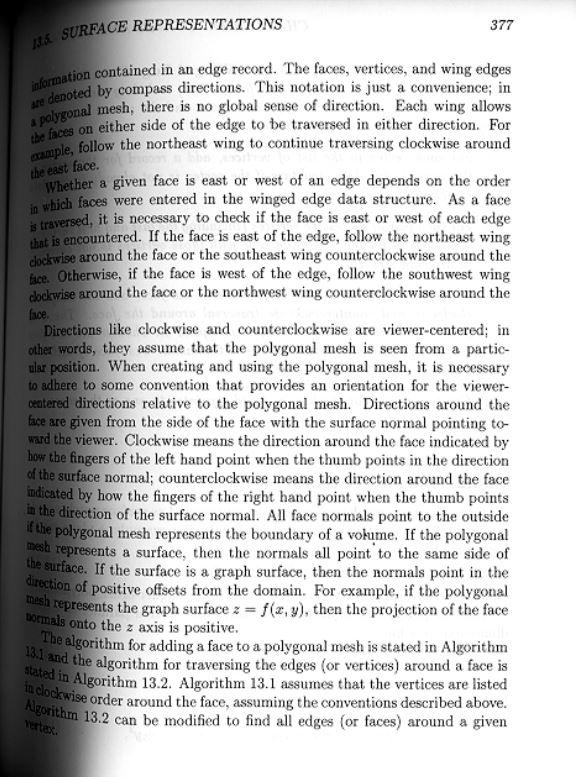

In [195]:
path = 'gutter.JPG'
img = cv2.imread(path)
cv2_imshow(img)

In [196]:
def padding(path):
  """function to pad the image in order to finally obtain a convolved image of the same shape as the original image"""
  img = cv2.imread(path)
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  kernel_size = [51,51]
  padded_image = np.zeros((gray_img.shape[0]+2*int(kernel_size[0]/2), gray_img.shape[1]+2*int(kernel_size[1]/2)))
  for i in range(int(kernel_size[0]/2), padded_image.shape[0]-int(kernel_size[0]/2)):
    for j in range(int(kernel_size[1]/2), padded_image.shape[1]-int(kernel_size[1]/2)):
      padded_image[i,j] = gray_img[i-int(kernel_size[1]/2), j-int(kernel_size[1]/2)]
  return padded_image

In [198]:
def smoothing(path):
  """image smoothing function using convolution operation"""
  img = cv2.imread(path)
  padded_image = padding(path)
  kernel = (1/2601)*(np.ones((51,51)))
  smooth_image = np.zeros((img.shape[0], img.shape[1]))
  for i in range(0,smooth_image.shape[0]):
    for j in range(0,smooth_image.shape[1]):
      matrix = padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]
      np.sum(np.multiply(matrix, kernel))
      smooth_image[i, j] = np.sum(np.multiply(matrix, kernel))
  return smooth_image

In [193]:
def output(path):
  """using custom algorithm utilizing thresholding for de-shadowing the image"""
  img = cv2.imread(path)
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  padded_image = padding(path)
  smooth_img = smoothing(path)
  sub_img = gray_img - smooth_img
  cout = 0
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      if(sub_img[i,j]<-10):
        sub_img[i,j] = 255
        cout+=1
  out = 255-sub_img
  return out

82994


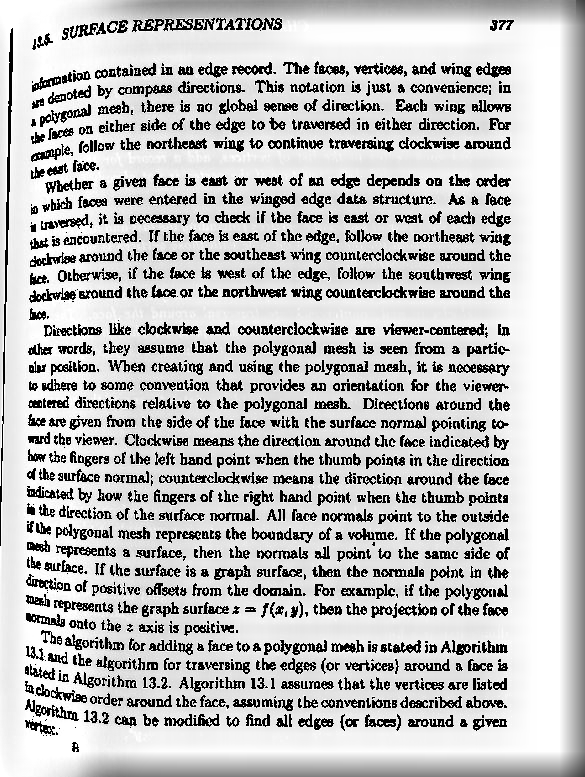

In [194]:
out = output(path)
cv2_imshow(out)
plt.imsave('cleaned-gutter.jpg', out)